<a href="https://colab.research.google.com/github/Manohar7781/Manohar7781/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
fromm google.colab import files
uploaded = files.upload()
df = pd.read_csv("BBC News Train.csv")
print(df.shape)
df.head(5)

Saving BBC News Train.csv to BBC News Train (1).csv
(1490, 3)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


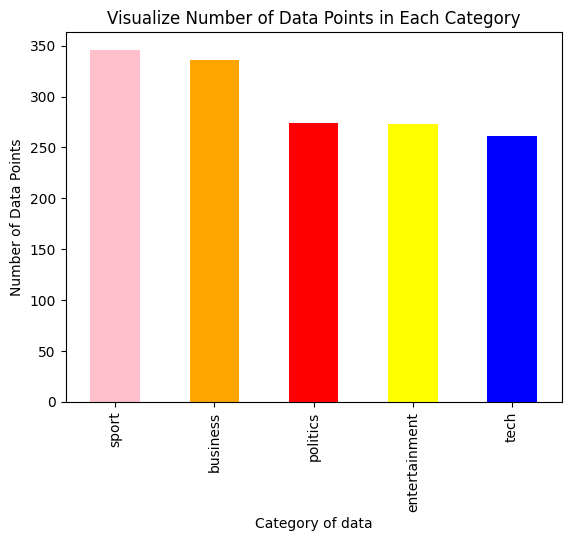

In [ ]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind="bar", color=["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel("Number of Data Points")
plt.title("Visualize Number of Data Points in Each Category")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = np.array(df.iloc[:,0].values)
y = np.array(df.Category.values)
tfidf = TfidfVectorizer(max_features = 5000)
x = tfidf.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (1490, 5000)
y.shape =  (1490,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)
print(len(x_train)))
print(len(x_test))


1192
298


In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
score = regressor.score(x_train, y_train)
print(score)

0.9949664429530202


In [ ]:
y_pred1 = tfidf.transform(['apple ipod family expands market apple has expanded its ipod family with the release of its next generation of the digital music players.  its latest challenges to the growing digital music gadget market include an ipod mini model which can hold 6gb compared to a previous 4gb. the company  which hopes to keep its dominant place in the digital music market  also said the gold coloured version of the mini would be dropped. a 30gb version has also been added to the ipod photo family. the latest models have a longer battery life and their prices have been cut by an average of Â£40. the original ipod took an early lead in the digital music player market thanks to its large storage capacity and simple design.  during 2004 about 25 million portable players were sold  10 million of which were apple ipods. but analysts agree that the success is also down to its integration with the itunes online store  which has given the company a 70% share of the legal download music market. mike mcguire  a research director at analyst gartner  told the bbc news website that apple had done a good job in  sealing off the market from competition  so far.  they have created a very seamless package which i think is the idea of the product - the design  function and the software are very impressive   he said. he added that the threat from others was always present  however.  creative  other microsoft-partnered devices  real  sony and so on  are ratcheting up the marketing message and advertising   he said. creative was very upbeat about how many of its creative zen players it had shipped by the end of last year  he said. its second-generation models  like the creative zen micro photo  is due out in the summer. it will have 5gb of memory on board.  digital music players are now the gadget of choice among young americans  according to recent research by the pew internet and american life project. one in 10 us adults - 22 million people - now owns a digital music player of some sort. sales of legally downloaded songs also rose more than tenfold in 2004  according to the record industry  with 200 million tracks bought online in the us and europe in 12 months. the ifpi industry body said that the popularity of portable music players was behind the growth. analysts say that the ease of use and growth of music services available on the net will continue to drive the trend towards portable music players.  people are also starting to use them in novel ways. some are combining automatic syncing functions many of them have with other net functions to automatically distribute diy radio shows  called podcasts. but 2005 will also see more competition from mobile phone operators who are keen to offer streaming services on much more powerful and sophisticated handsets. according to mr mcguire  research suggests that people like the idea of building up huge libraries of music  which they can do with high-capacity storage devices  like ipods and creative zens. mobiles do not yet have this capacity though  and there are issues about the ease of portability of mobile music. mr mcguire said apple was ensuring it kept a foot in the mobile music door with its recent deal with motorola to produce a version of itunes for motorola phones.'])
yy = regressor.predict(y_pred1)
yy[0]


'tech'